## 1. Importing relavant packages

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading in file
df = pd.read_csv('data/agaricus-lepiota.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. EDA

In [3]:
#renaming columns 
df.rename(columns = {0:"classes", 1: "cap_shape", 2: "cap_surface", 3: "cap_color", 4: "bruises",
                                5: "odor", 6: "gill_attachment", 7: "gill_spacing", 8: "gill_size",
                                9: "gill_color", 10: "stalk_shape", 11: "stalk_root", 12: "stalk_surface_above_ring",
                                13: "stalk_surface_below_ring", 14: "stalk_color_above_ring",15: "stalk_color_below_ring",
                                16: "veil_type", 17: "veil_color", 18: "ring_number", 19: "ring_type",
                                20: "spore_print_color", 21: "population", 22: "habitat"}, inplace=True)
df.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#replacing elements in the dataframe

df['classes'] = df['classes'].replace({ 'p':'poisonous', 
                                        'e':'edible'})
df['cap_shape'] = df['cap_shape'].replace({'b':'bell',
                                           'c':'conical',
                                           'x':'convex',
                                           'f':'flat',
                                           'k':'knobbed',
                                           's':'sunken'})
df['cap_surface'] = df['cap_surface'].replace({'f':'fibrous',
                                           'g':'grooves',
                                           'y':'scaly',
                                           's':'smooth'})
df['cap_color'] = df['cap_color'].replace({ 'n':'brown',
                                       'b':'buff',
                                       'c':'cinnamon',
                                       'g':'gray',
                                       'o':'orange',
                                       'p':'pink',
                                       'e':'red',
                                       'w':'white',
                                       'y':'yellow'})
df['bruises'] = df['bruises'].replace({ 't':'bruises',
                                        'f':'no'})
df['odor'] = df['odor'].replace({ 'a':'almond',
                                       'l':'anise',
                                       'c':'creosote',
                                       'y':'fishy',
                                       'f':'foul',
                                       'm':'musty',
                                       'n':'none',
                                       'p':'pungent',
                                       's':'spicy'})
df['gill_attachment'] = df['gill_attachment'].replace({ 'a':'attached',
                                       'd':'descending',
                                       'f':'free',
                                       'n':'notched'})
df['gill_spacing'] = df['gill_spacing'].replace({ 'c':'close',
                                        'w':'crowded',
                                        'd':'distant'})
df['gill_size'] = df['gill_size'].replace({ 'b':'broad',
                                           'n':'narrow'})
df['gill_color'] = df['gill_color'].replace({ 'k':'black',
                                       'n':'brown',
                                       'b':'buff',
                                       'h':'chocolate',
                                       'g':'gray',
                                       'r':'green',
                                       'o':'orange',
                                       'p':'pink',
                                       'u':'purple',
                                       'e':'red',
                                       'w':'white',
                                       'y':'yellow'})
df['stalk_shape'] = df['stalk_shape'].replace({ 'e':'enlarging',
                                        't':'tapering'})
df['stalk_root'] = df['stalk_root'].replace({ 'b':'bulbous',
                                       'c':'club',
                                       'u':'cup',
                                       'e':'equal',
                                       'z':'rhizomorphs',
                                       'r':'rooted',
                                       '?':np.nan})
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace({ 'f':'fibrous',
                                       'y':'scaly',
                                       'k':'silky',
                                       's':'smooth'})
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace({ 'f':'fibrous',
                                       'y':'scaly',
                                       'k':'silky',
                                       's':'smooth'})
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace({ 'n':'brown',
                                       'b':'buff',
                                       'c':'cinnamon',
                                       'g':'gray',
                                       'o':'orange',
                                       'p':'pink',
                                       'e':'red',
                                       'w':'white',
                                       'y':'yellow'})
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace({ 'n':'brown',
                                       'b':'buff',
                                       'c':'cinnamon',
                                       'g':'gray',
                                       'o':'orange',
                                       'p':'pink',
                                       'e':'red',
                                       'w':'white',
                                       'y':'yellow'})
df['veil_type'] = df['veil_type'].replace({ 'p':'partial',
                                        'u':'universal'})
df['veil_color'] = df['veil_color'].replace({ 'n':'brown',
                                       'o':'orange',
                                       'w':'white',
                                       'y':'yellow'})
df['ring_number'] = df['ring_number'].replace({ 'n':'none',
                                       'o':'one',
                                       't':'two'})
df['ring_type'] = df['ring_type'].replace({ 'c':'cobwebby',
                                       'e':'evanescent',
                                       'f':'flaring',
                                       'l':'large',
                                       'n':'none',
                                       'p':'pendant',
                                       's':'sheathing',
                                       'z':'zone'})
df['spore_print_color'] = df['spore_print_color'].replace({ 'k':'black',
                                       'n':'brown',
                                       'b':'buff',
                                       'h':'chocolate',
                                       'r':'green',
                                       'o':'orange',
                                       'u':'purple',
                                       'w':'white',
                                       'y':'yellow'})
df['population'] = df['population'].replace({ 'a':'abundant',
                                       'c':'clustered',
                                       'n':'numerous',
                                       's':'scattered',
                                       'v':'several',
                                       'y':'solitary'})
df['habitat'] = df['habitat'].replace({ 'g':'grasses',
                                       'l':'leaves',
                                       'm':'meadows',
                                       'p':'paths',
                                       'u':'urban',
                                       'w':'waste',
                                       'd':'woods'})
df.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
##Cleaning up dataframe

#Looking into our data
df.info

#Repalcing all "?" with "np.nan"
df=df.replace("?", np.nan)

#Replacing all nan values with mean of column
for col in df:
    if df[col].dtype == 'object':
        df = df.fillna(df[col].value_counts().index[0])
        
df.isnull().sum()


classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

## 3. Analysis
### 3.1 Basic descriptives

In [6]:
#Description of dataframe
df.describe()

#prevalance of positive mushrooms
df['classes'].value_counts()

edible       4208
poisonous    3916
Name: classes, dtype: int64

In [7]:
#Label encoding
label = LabelEncoder()
for col in df.columns:
    df[col]=label.fit_transform(df[col])

### 3.2 Correlation

In [16]:
df.corr() 

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
classes,1.000000,0.199488,0.186806,0.046765,0.501530,-0.086800,0.129200,-0.348387,0.540024,-0.270247,...,-0.139254,-0.263928,-0.245231,NaN,0.145142,-0.214366,-0.411771,0.519438,0.298686,-0.022363
cap_shape,0.199488,1.000000,-0.007059,-0.201408,0.199703,0.251055,0.032099,-0.061368,0.259001,-0.069180,...,-0.068732,-0.059667,-0.067470,NaN,0.036995,-0.069245,-0.304673,0.251207,0.129000,0.134210
cap_surface,0.186806,-0.007059,1.000000,-0.033283,0.019547,-0.105749,-0.161757,-0.096076,0.274933,-0.122924,...,-0.000094,0.250617,0.260090,NaN,-0.154804,0.060429,-0.171361,0.310188,-0.188979,-0.191609
cap_color,0.046765,-0.201408,-0.033283,1.000000,-0.033237,-0.346188,0.191183,0.047145,-0.127245,-0.012348,...,-0.052132,-0.052675,-0.034326,NaN,0.187481,0.010049,0.112436,-0.112221,-0.032999,-0.121441
bruises,0.501530,0.199703,0.019547,-0.033237,1.000000,0.079235,-0.137359,0.299473,0.369596,-0.348658,...,-0.323013,-0.197177,-0.213054,NaN,-0.119770,-0.056788,-0.692973,0.519982,-0.088137,-0.305354
odor,-0.086800,0.251055,-0.105749,-0.346188,0.079235,1.000000,-0.092471,0.114297,0.037037,0.074913,...,0.060100,-0.012270,-0.026790,NaN,-0.086768,0.164708,-0.161269,0.093370,0.003753,0.126054
gill_attachment,0.129200,0.032099,-0.161757,0.191183,-0.137359,-0.092471,1.000000,0.071489,0.108984,-0.080726,...,-0.075554,0.122946,0.116158,NaN,0.897518,0.093236,-0.146689,-0.068909,0.165575,0.115387
gill_spacing,-0.348387,-0.061368,-0.096076,0.047145,0.299473,0.114297,0.071489,1.000000,-0.108333,-0.037735,...,-0.241945,0.319259,0.271301,NaN,0.073363,0.243014,-0.195897,-0.092992,-0.529253,-0.397884
gill_size,0.540024,0.259001,0.274933,-0.127245,0.369596,0.037037,0.108984,-0.108333,1.000000,-0.330580,...,0.087102,0.271111,0.228629,NaN,0.103809,-0.171362,-0.460872,0.549444,0.147682,0.088058
gill_color,-0.270247,-0.069180,-0.122924,-0.012348,-0.348658,0.074913,-0.080726,-0.037735,-0.330580,1.000000,...,0.057044,-0.064741,-0.101458,NaN,-0.048532,0.235151,0.389234,-0.144126,0.027168,0.185011


### 3.2  Splitting dataset

In [9]:
#initiating X and Y variables
X = df[df.columns[1:]]
y = df.classes

#creating dummy variables
x_dum = pd.get_dummies(X)
y_dum = df['classes']

#spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x_dum, y_dum, test_size=0.20, stratify=y_dum, random_state=42)

#looking at the data shape of each dataframes
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(6499,) (6499, 22)
(1625,) (1625, 22)


### 3.3 Rescaling dataframes

In [10]:
#rescaling the x_train and x_test
X_train= MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

### 3.4 Launch decision tree classifier

In [11]:
#fitting x and y training sets
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

### 3.5 initializing classification report

In [12]:
print('Decision Tree classification report:')
print('\n')
print('Test data')
print(classification_report(y_test, y_pred_test))           
print('\n')
print('Train data')
print(classification_report(y_train, y_pred_train))

Decision Tree classification report:


Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



### 3.6 Confusion matrix

In [13]:
print('Test data')
print(confusion_matrix(y_test, y_pred_test))
print('\n')
print('Train data')
print(confusion_matrix(y_train, y_pred_train))

Test data
[[842   0]
 [  0 783]]


Train data
[[3366    0]
 [   0 3133]]


###  3.7 ROC Curve

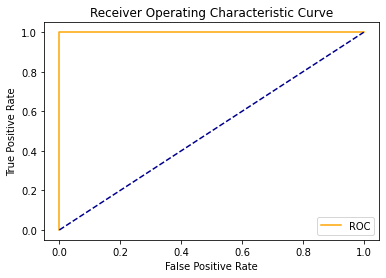

In [14]:
roc_score = roc_auc_score(y_test, y_pred_test)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred_test)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()